In [38]:
# Import libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [37]:
# Setting the default style for all plots

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#ADD8E6'

In [21]:
# load data set

netflix = pd.read_csv("netflix price in different countries.csv")
netflix.head(4)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54


In [22]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


From the information the info() function has provided, we can see that there are 65 entries an 65 non-null values which indicates that there are no null values in this data set.

In [39]:
# Rename the columns for better usability

netflix = netflix.rename(columns={"Country":"country", "Total Library Size":"total_library_size", 
                        "No. of TV Shows":"no_of_tv_shows", "No. of Movies":"no_of_movies", 
                        "Cost Per Month - Basic ($)":"basic_cost_per_month", 
                        "Cost Per Month - Standard ($)":"standard_cost_per_month", 
                        "Cost Per Month - Premium ($)":"premium_cost_per_month"})


netflix.head(2)

,country,total_library_size,no_of_tv_shows,no_of_movies,basic_cost_per_month,standard_cost_per_month,premium_cost_per_month
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32


In [24]:
netflix.describe()

,total_library_size,no_of_tv_shows,no_of_movies,basic_cost_per_month,standard_cost_per_month,premium_cost_per_month
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [25]:
# Use the sort values method to find the countries with the largest library size

netflix.sort_values(by="total_library_size", ascending=True).head(4)

,country,total_library_size,no_of_tv_shows,no_of_movies,basic_cost_per_month,standard_cost_per_month,premium_cost_per_month
7,Croatia,2274,1675,599,9.03,11.29,13.54
35,San Marino,2310,1937,373,9.03,14.67,20.32
23,Liechtenstein,3048,1712,1336,12.88,20.46,26.96
58,Indonesia,3887,2449,1438,8.36,10.66,12.96


In [26]:
# Creating a new data frame for a bar graph 

basic = netflix.groupby("country", as_index= False)[['basic_cost_per_month']].sum()
top10_low_priced = basic.sort_values(by= 'basic_cost_per_month', ascending= True).head(10)

premium = netflix.groupby("country", as_index=False)[["premium_cost_per_month"]].sum()
top10_costliest = premium.sort_values(by= 'premium_cost_per_month', ascending= False).head(10)

C:\Users\TONIA\AppData\Local\Temp/ipykernel_6500/1864679583.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
C:\Users\TONIA\AppData\Local\Temp/ipykernel_6500/1864679583.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


Text(599.1068181818181, 0.5, 'Premium Fee Per Month')

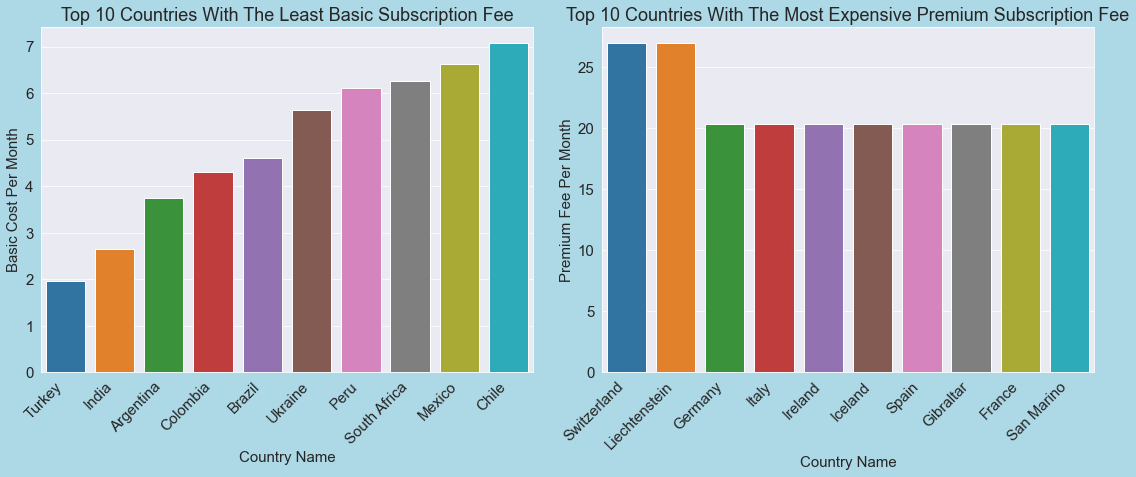

In [27]:
# Plotting bar graphs for basic and premium cost per month

fig, axes = plt.subplots(1,2, figsize= (16, 6))
plt.tight_layout(pad= 2)
xlabels = top10_low_priced.country
axes[0].set_title('Top 10 Countries With The Least Basic Subscription Fee')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= top10_low_priced.country, y= top10_low_priced.basic_cost_per_month, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Basic Cost Per Month')

xlabels = top10_costliest.country
axes[1].set_title('Top 10 Countries With The Most Expensive Premium Subscription Fee')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= top10_costliest.country, y= top10_costliest.premium_cost_per_month, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Premium Fee Per Month')

Text(0, 0.5, '')

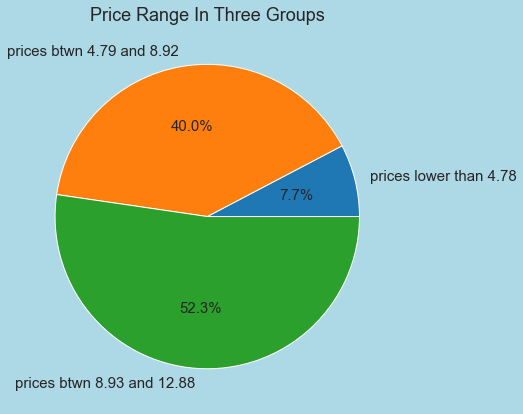

In [28]:
# Trying to find the percentages when the basic cost per month is grouped into three

# Number of countries below the 25th percentile
range1 = netflix[netflix.basic_cost_per_month <= 4.78].count()

# Number of countries in the 50th percentile
range2 = netflix[ (netflix.basic_cost_per_month <= 4.79) & (netflix.basic_cost_per_month >= 8.92)].count()

# Number of countries that pay between 8.93 and 12.88
range3 = netflix[ (netflix.basic_cost_per_month <=12.88) & (netflix.basic_cost_per_month >= 8.93)].count()

# Calculating the percentages
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    return float(percentage)

percentages = [ percentage(5, 65),
                percentage(26, 65),
                percentage(34, 65) ]

# Visualizing the percentages with a pie chart
labels = ['prices lower than 4.78', 'prices btwn 4.79 and 8.92', 'prices btwn 8.93 and 12.88']
plt.pie(percentages, labels=labels, autopct = '%1.1f%%')
plt.title('Price Range In Three Groups')
plt.ylabel('')

The Pie chart shows that only 7.7% of the countries in this data set pay less than 4.78 and over 50% of the countries pay over 8.93 for the basic package.

CORRELATION

In [29]:
netflix.corr()

,total_library_size,no_of_tv_shows,no_of_movies,basic_cost_per_month,standard_cost_per_month,premium_cost_per_month
total_library_size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
no_of_tv_shows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
no_of_movies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
basic_cost_per_month,-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
standard_cost_per_month,-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
premium_cost_per_month,-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


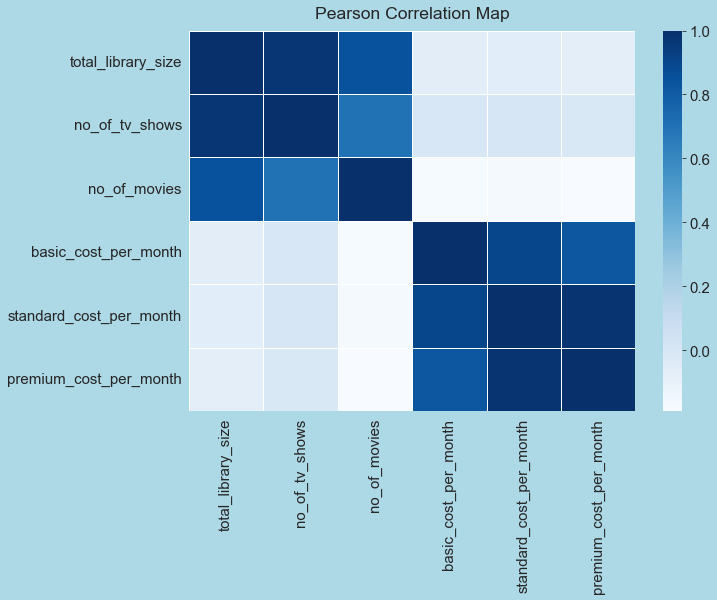

In [30]:
# Correlation Map

sns.heatmap(netflix.corr(), linewidths = 0.5, cmap = "Blues")
plt.title("Pearson Correlation Map", fontsize = 17.5, pad = 12)
plt.show()


Made a correlation map to find out if the price of the different subscription packages in each country was determined by the total library package or the number of the tv shows and number of the movies. In all the three cases it shows a negative correlation which brings to the conclusion that in this case, correlation does not equal causation.

EUROPEAN COUNTRIES

Next, I want to know the number of european countries on the dataset and the differences in their data. I'll bring in a dataset of only european countries.

In [31]:
# Load dataset of european countries

europe = pd.read_csv("list-of-european-countries.csv")
europe.sort_values(by='country', ascending=True, inplace=True)
europe.tail(4)

,country
18,Switzerland
6,Ukraine
3,United Kingdom
51,Vatican City


In [32]:
# Inner join on the column, 'country'

eu_netflix = netflix.merge(europe, how='inner', on='country')
eu_netflix.head(4)   

,country,total_library_size,no_of_tv_shows,no_of_movies,basic_cost_per_month,standard_cost_per_month,premium_cost_per_month
0,Austria,5640,3779,1861,9.03,14.67,20.32
1,Bulgaria,6797,4819,1978,9.03,11.29,13.54
2,Croatia,2274,1675,599,9.03,11.29,13.54
3,Estonia,6456,4486,1970,9.03,11.29,13.54


In [33]:
eu_netflix.shape

(32, 7)

Their are 32 european countries out of the 65 cuntries in the netflix dataset

<BarContainer object of 32 artists>

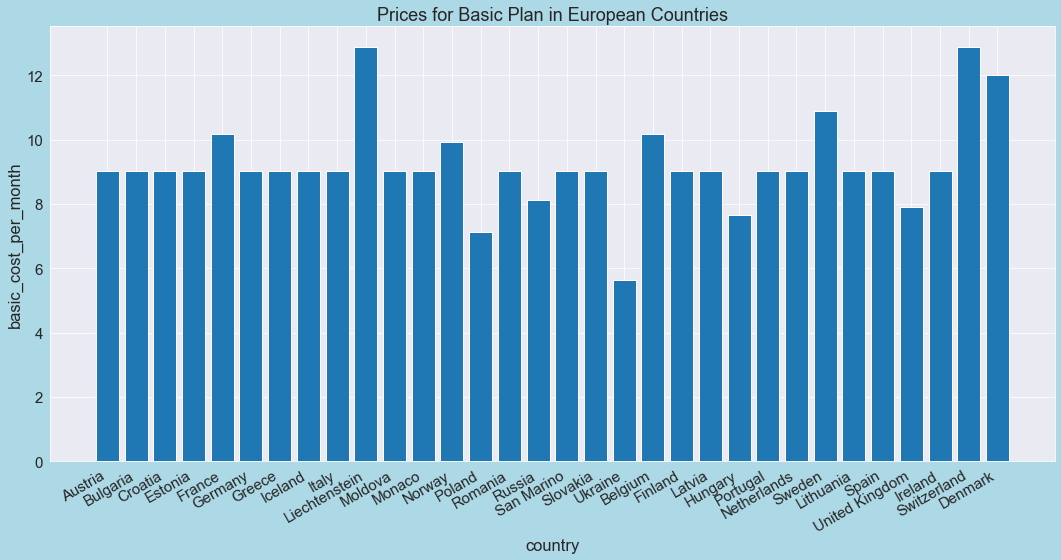

In [34]:
#Plot a bar graph for basic cost per month in european countries

plt.rcParams['figure.figsize']= (18, 8)
plt.title('Prices for Basic Plan in European Countries')
plt.xlabel('country', fontsize = 16.5)
plt.ylabel('basic_cost_per_month', fontsize= 16.5)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(eu_netflix.country, eu_netflix.basic_cost_per_month)

<BarContainer object of 32 artists>

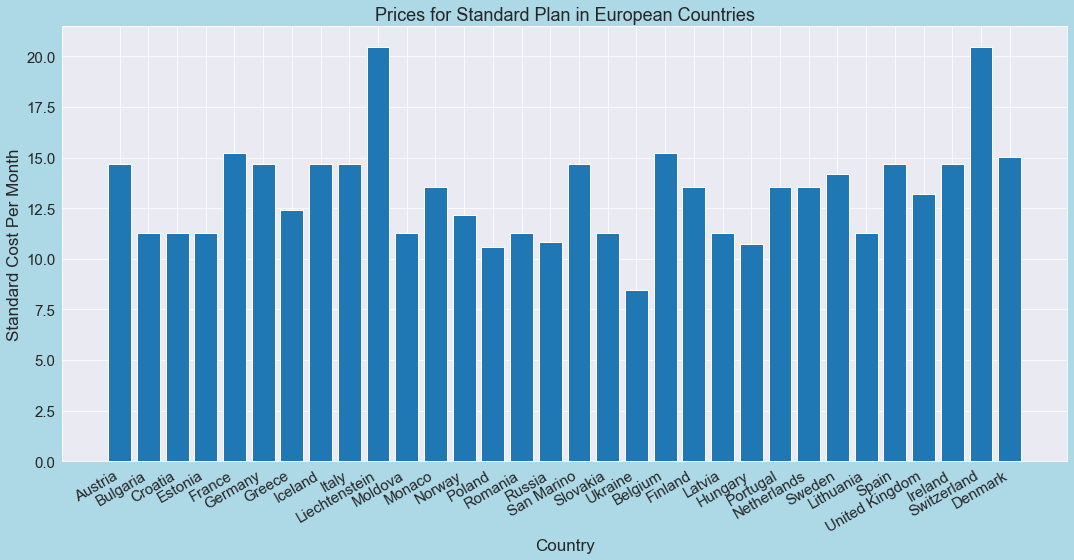

In [35]:
# Plot a bar graph for the standard cost per month in european countries

plt.rcParams['figure.figsize']= (18, 8)
plt.title('Prices for Standard Plan in European Countries')
plt.xlabel('Country', fontsize = 17)
plt.ylabel('Standard Cost Per Month', fontsize= 17)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(eu_netflix.country, eu_netflix.standard_cost_per_month)

<BarContainer object of 32 artists>

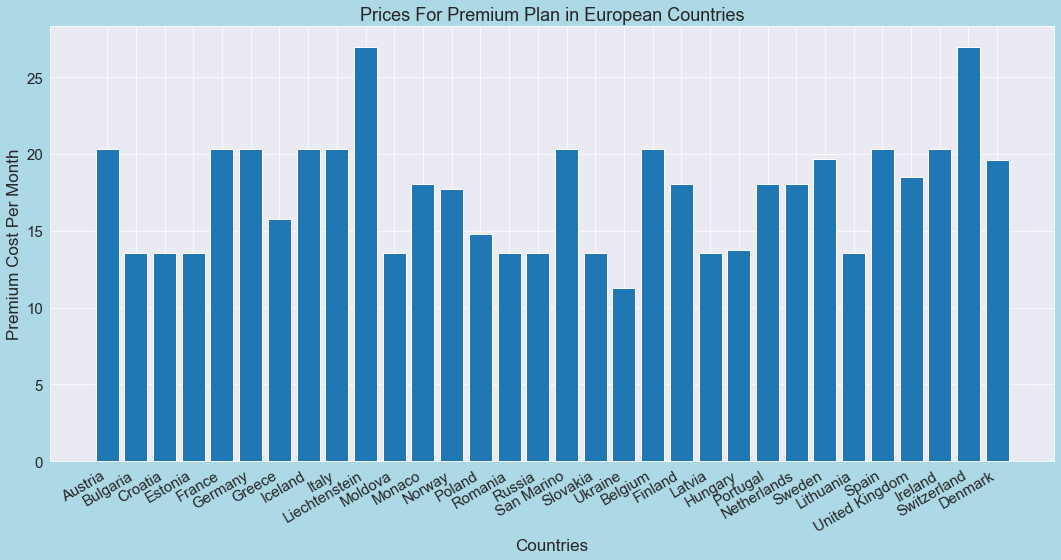

In [36]:
#Plot a bar graph for premium cost per month in european countries

plt.rcParams['figure.figsize']= (18, 8)
plt.title('Prices For Premium Plan in European Countries')
plt.xlabel('Countries', fontsize = 17)
plt.ylabel('Premium Cost Per Month', fontsize= 17)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(eu_netflix.country, eu_netflix.premium_cost_per_month)

In the three graphs, are two countries, Liechenstein and Switzerland whose pricing consistently remain the highest amongst the three netflix packages. A quick Google serach explains why. "The Swiss franc is the only official currency in Switzerland and in Liechtenstein. The franc is the only currency accepted everywhere."
Their pricing is not in euro as it is with the other countries, hence, the noticable difference in price range.